In [1]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\EJ312WS\Downloads\Dataset (1)\Dataset\train_one.xlsx"

# Read the Excel file and select the sheet you want to read
df = pd.read_excel(file_path)

# Print the contents of the she
df.head()

,Unnamed: 0,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,Date
0,0,2018-01-01 00:15:00,3.21,2.96,0.0,73.21,100.0,Low,105,2018-01-01
1,1,2018-01-01 00:30:00,3.95,4.46,0.0,66.78,100.0,Low,101,2018-01-01
2,2,2018-01-01 00:45:00,3.23,3.28,0.0,70.27,100.0,Low,94,2018-01-01
3,3,2018-01-01 01:00:00,3.33,3.56,0.0,68.10,100.0,Low,99,2018-01-01
4,4,2018-01-01 01:15:00,3.79,4.49,0.0,64.72,100.0,Low,109,2018-01-01


In [3]:
df.nunique()

Unnamed: 0                         91
date                            32850
Energy_Consumption               7804
LaRP                             5390
LeRP                             2458
LaPF                             5577
LePF                             3322
Duty                                3
Emissions_Air_Quality_Metric       26
Date                              365
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32850 entries, 0 to 32849
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    32850 non-null  int64         
 1   date                          32850 non-null  datetime64[ns]
 2   Energy_Consumption            32850 non-null  float64       
 3   LaRP                          32850 non-null  float64       
 4   LeRP                          32850 non-null  float64       
 5   LaPF                          32850 non-null  float64       
 6   LePF                          32850 non-null  float64       
 7   Duty                          32850 non-null  object        
 8   Emissions_Air_Quality_Metric  32850 non-null  int64         
 9   Date                          32850 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 2.5+ MB


In [7]:
df=df.drop(['Unnamed: 0','Date'],axis=1)
df.head()

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric
0,2018-01-01 00:15:00,3.21,2.96,0.0,73.21,100.0,Low,105
1,2018-01-01 00:30:00,3.95,4.46,0.0,66.78,100.0,Low,101
2,2018-01-01 00:45:00,3.23,3.28,0.0,70.27,100.0,Low,94
3,2018-01-01 01:00:00,3.33,3.56,0.0,68.10,100.0,Low,99
4,2018-01-01 01:15:00,3.79,4.49,0.0,64.72,100.0,Low,109


In [9]:
df.isnull().sum()

date                            0
Energy_Consumption              0
LaRP                            0
LeRP                            0
LaPF                            0
LePF                            0
Duty                            0
Emissions_Air_Quality_Metric    0
dtype: int64

In [11]:
df.date=pd.to_datetime(df.date, infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32850 entries, 0 to 32849
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          32850 non-null  datetime64[ns]
 1   Energy_Consumption            32850 non-null  float64       
 2   LaRP                          32850 non-null  float64       
 3   LeRP                          32850 non-null  float64       
 4   LaPF                          32850 non-null  float64       
 5   LePF                          32850 non-null  float64       
 6   Duty                          32850 non-null  object        
 7   Emissions_Air_Quality_Metric  32850 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.0+ MB


In [13]:
def day_part(hour):
    if hour in [4,5]:
        return 1
    elif hour in [6,7]:
        return 2
    elif hour in [8,9,10]:
        return 3
    elif hour in [11,12,13]:
        return 4
    elif hour in [14,15,16]:
        return 5
    elif hour in [17, 18,19]:
        return 6
    elif hour in [20, 21, 22]:
        return 7
    elif hour in [23,0,1,2,3]:
        return 0

In [15]:
import numpy as np


# Extract date features
df['date:year'] = df['date'].dt.year
df['date:month'] = df['date'].dt.month
df['date:day'] = df['date'].dt.day
df['date:day_of_week'] = df['date'].dt.dayofweek  # corrected attribute name
df['date:day_of_year'] = df['date'].dt.dayofyear  # corrected attribute name
df['date:is_year_start'] = df['date'].dt.is_year_start
df['date:is_quarter_start'] = df['date'].dt.is_quarter_start
df['date:is_year_end'] = df['date'].dt.is_year_end
df['date:is_quarter_end'] = df['date'].dt.is_quarter_end
df['date:is_month_start'] = df['date'].dt.is_month_start
df['date:is_month_end'] = df['date'].dt.is_month_end
df['date:is_weekend'] = np.where(df['date:day_of_week'].isin([5,6]), 1, 0)
df['date:hour'] = df['date'].dt.hour
df['date:minute'] = df['date'].dt.minute
df['date:day_part'] = df['date:hour'].apply(day_part)

# Convert boolean columns to integer
df[['date:is_month_end', 'date:is_month_start',
    'date:is_quarter_end', 'date:is_quarter_start',
    'date:is_year_end', 'date:is_year_start']] = df[['date:is_month_end', 'date:is_month_start',
    'date:is_quarter_end', 'date:is_quarter_start',
    'date:is_year_end', 'date:is_year_start']].replace({True: 1, False: 0})

# Drop the original 'date' column
#df = df.drop(['date'], axis=1)

# Print the first few rows of the modified DataFrame
df

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:year,date:month,...,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,2018-01-01 00:15:00,3.21,2.96,0.00,73.21,100.00,Low,105,2018,1,...,1,1,0,0,1,0,0,0,15,0
1,2018-01-01 00:30:00,3.95,4.46,0.00,66.78,100.00,Low,101,2018,1,...,1,1,0,0,1,0,0,0,30,0
2,2018-01-01 00:45:00,3.23,3.28,0.00,70.27,100.00,Low,94,2018,1,...,1,1,0,0,1,0,0,0,45,0
3,2018-01-01 01:00:00,3.33,3.56,0.00,68.10,100.00,Low,99,2018,1,...,1,1,0,0,1,0,0,1,0,0
4,2018-01-01 01:15:00,3.79,4.49,0.00,64.72,100.00,Low,109,2018,1,...,1,1,0,0,1,0,0,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32845,2018-12-31 22:45:00,3.84,4.56,0.00,64.37,100.00,Low,91,2018,12,...,0,0,1,1,0,1,0,22,45,7
32846,2018-12-31 23:15:00,3.81,3.76,0.00,70.71,100.00,Low,99,2018,12,...,0,0,1,1,0,1,0,23,15,0
32847,2018-12-31 23:30:00,3.82,3.16,0.07,76.64,99.99,Low,107,2018,12,...,0,0,1,1,0,1,0,23,30,0
32848,2018-12-31 23:45:00,3.85,3.07,0.13,77.72,99.96,Low,105,2018,12,...,0,0,1,1,0,1,0,23,45,0


In [17]:
nunique_df=df.nunique().reset_index()
remove_col=nunique_df[(nunique_df[0]==0) | (nunique_df[0]==1) ]['index'].tolist()
remove_col[:5]

['date:year']

In [19]:
df=df.drop(remove_col,axis=1)
df

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,...,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,2018-01-01 00:15:00,3.21,2.96,0.00,73.21,100.00,Low,105,1,1,...,1,1,0,0,1,0,0,0,15,0
1,2018-01-01 00:30:00,3.95,4.46,0.00,66.78,100.00,Low,101,1,1,...,1,1,0,0,1,0,0,0,30,0
2,2018-01-01 00:45:00,3.23,3.28,0.00,70.27,100.00,Low,94,1,1,...,1,1,0,0,1,0,0,0,45,0
3,2018-01-01 01:00:00,3.33,3.56,0.00,68.10,100.00,Low,99,1,1,...,1,1,0,0,1,0,0,1,0,0
4,2018-01-01 01:15:00,3.79,4.49,0.00,64.72,100.00,Low,109,1,1,...,1,1,0,0,1,0,0,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32845,2018-12-31 22:45:00,3.84,4.56,0.00,64.37,100.00,Low,91,12,31,...,0,0,1,1,0,1,0,22,45,7
32846,2018-12-31 23:15:00,3.81,3.76,0.00,70.71,100.00,Low,99,12,31,...,0,0,1,1,0,1,0,23,15,0
32847,2018-12-31 23:30:00,3.82,3.16,0.07,76.64,99.99,Low,107,12,31,...,0,0,1,1,0,1,0,23,30,0
32848,2018-12-31 23:45:00,3.85,3.07,0.13,77.72,99.96,Low,105,12,31,...,0,0,1,1,0,1,0,23,45,0


In [21]:
df['Duty'].value_counts()

Low        16965
Average     9083
Major       6802
Name: Duty, dtype: int64

In [23]:
df['Duty']=df['Duty'].replace({'Low':0, 
                       'Average':1,
                       'Major':2})
df

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,...,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,2018-01-01 00:15:00,3.21,2.96,0.00,73.21,100.00,0,105,1,1,...,1,1,0,0,1,0,0,0,15,0
1,2018-01-01 00:30:00,3.95,4.46,0.00,66.78,100.00,0,101,1,1,...,1,1,0,0,1,0,0,0,30,0
2,2018-01-01 00:45:00,3.23,3.28,0.00,70.27,100.00,0,94,1,1,...,1,1,0,0,1,0,0,0,45,0
3,2018-01-01 01:00:00,3.33,3.56,0.00,68.10,100.00,0,99,1,1,...,1,1,0,0,1,0,0,1,0,0
4,2018-01-01 01:15:00,3.79,4.49,0.00,64.72,100.00,0,109,1,1,...,1,1,0,0,1,0,0,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32845,2018-12-31 22:45:00,3.84,4.56,0.00,64.37,100.00,0,91,12,31,...,0,0,1,1,0,1,0,22,45,7
32846,2018-12-31 23:15:00,3.81,3.76,0.00,70.71,100.00,0,99,12,31,...,0,0,1,1,0,1,0,23,15,0
32847,2018-12-31 23:30:00,3.82,3.16,0.07,76.64,99.99,0,107,12,31,...,0,0,1,1,0,1,0,23,30,0
32848,2018-12-31 23:45:00,3.85,3.07,0.13,77.72,99.96,0,105,12,31,...,0,0,1,1,0,1,0,23,45,0


In [25]:
# Replace 0 with 0.1 in the 'LeRP' column
#df['LeRP'] = df['LeRP'].replace(0, 0.1)

# Total Reactive Power (TRP)
df['TRP'] = df['LaRP'] - df['LeRP']

# Combined Power Factor (Combined PF)
df['Combined PF'] = (df['LaPF'] + df['LePF']) / 2

# Displaying the DataFrame
df

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,...,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part,TRP,Combined PF
0,2018-01-01 00:15:00,3.21,2.96,0.00,73.21,100.00,0,105,1,1,...,0,0,1,0,0,0,15,0,2.96,86.605
1,2018-01-01 00:30:00,3.95,4.46,0.00,66.78,100.00,0,101,1,1,...,0,0,1,0,0,0,30,0,4.46,83.390
2,2018-01-01 00:45:00,3.23,3.28,0.00,70.27,100.00,0,94,1,1,...,0,0,1,0,0,0,45,0,3.28,85.135
3,2018-01-01 01:00:00,3.33,3.56,0.00,68.10,100.00,0,99,1,1,...,0,0,1,0,0,1,0,0,3.56,84.050
4,2018-01-01 01:15:00,3.79,4.49,0.00,64.72,100.00,0,109,1,1,...,0,0,1,0,0,1,15,0,4.49,82.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32845,2018-12-31 22:45:00,3.84,4.56,0.00,64.37,100.00,0,91,12,31,...,1,1,0,1,0,22,45,7,4.56,82.185
32846,2018-12-31 23:15:00,3.81,3.76,0.00,70.71,100.00,0,99,12,31,...,1,1,0,1,0,23,15,0,3.76,85.355
32847,2018-12-31 23:30:00,3.82,3.16,0.07,76.64,99.99,0,107,12,31,...,1,1,0,1,0,23,30,0,3.09,88.315
32848,2018-12-31 23:45:00,3.85,3.07,0.13,77.72,99.96,0,105,12,31,...,1,1,0,1,0,23,45,0,2.94,88.840


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32850 entries, 0 to 32849
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          32850 non-null  datetime64[ns]
 1   Energy_Consumption            32850 non-null  float64       
 2   LaRP                          32850 non-null  float64       
 3   LeRP                          32850 non-null  float64       
 4   LaPF                          32850 non-null  float64       
 5   LePF                          32850 non-null  float64       
 6   Duty                          32850 non-null  int64         
 7   Emissions_Air_Quality_Metric  32850 non-null  int64         
 8   date:month                    32850 non-null  int64         
 9   date:day                      32850 non-null  int64         
 10  date:day_of_week              32850 non-null  int64         
 11  date:day_of_year            

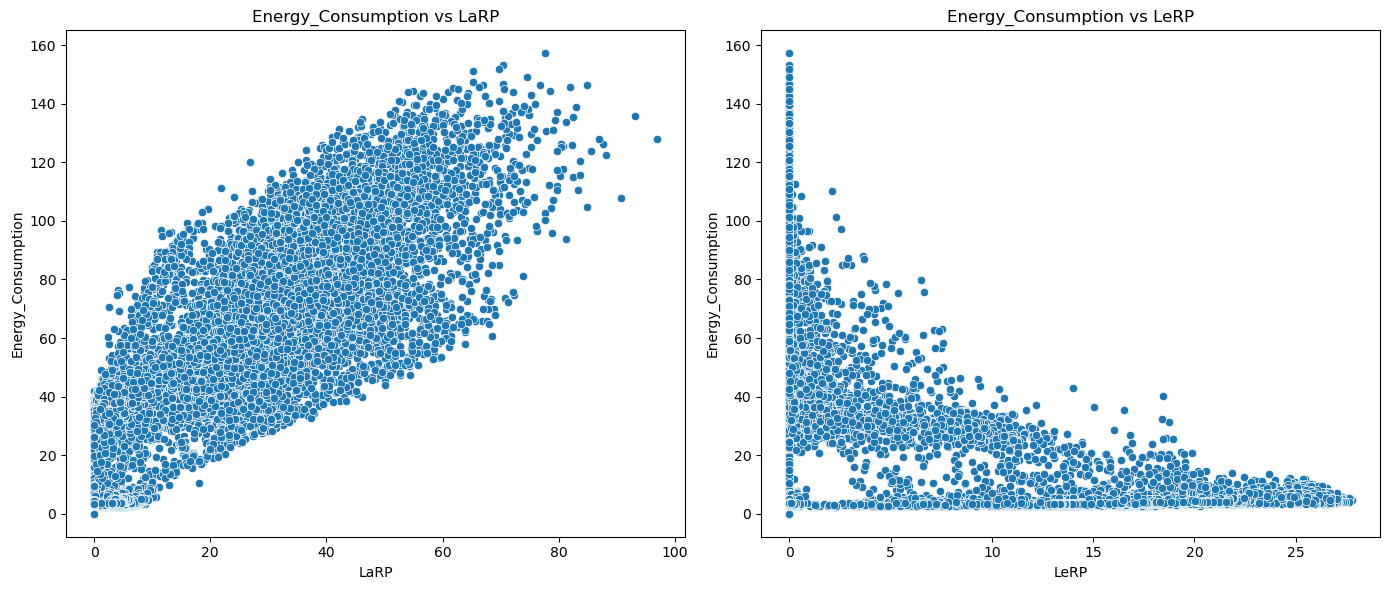

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
# Scatter plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='LaRP', y='Energy_Consumption', data=df)
plt.title('Energy_Consumption vs LaRP')

plt.subplot(1, 2, 2)
sns.scatterplot(x='LeRP', y='Energy_Consumption', data=df)
plt.title('Energy_Consumption vs LeRP')

plt.tight_layout()
plt.show()

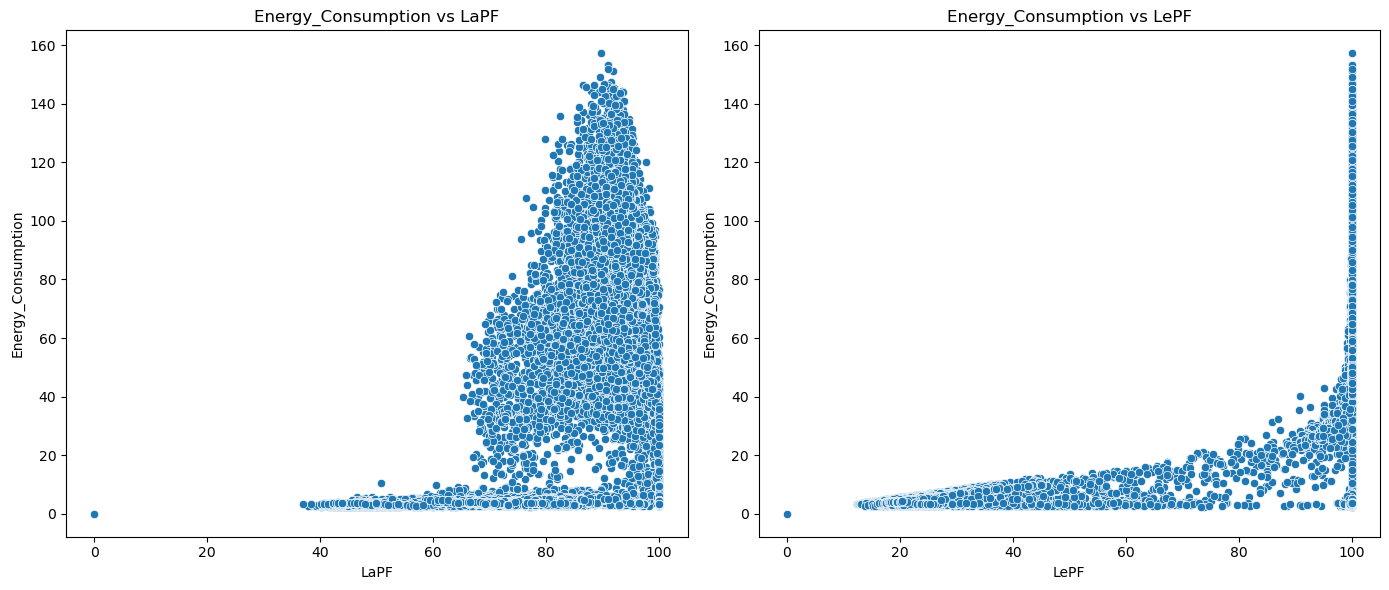

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
# Scatter plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='LaPF', y='Energy_Consumption', data=df)
plt.title('Energy_Consumption vs LaPF')

plt.subplot(1, 2, 2)
sns.scatterplot(x='LePF', y='Energy_Consumption', data=df)
plt.title('Energy_Consumption vs LePF')

plt.tight_layout()
plt.show()

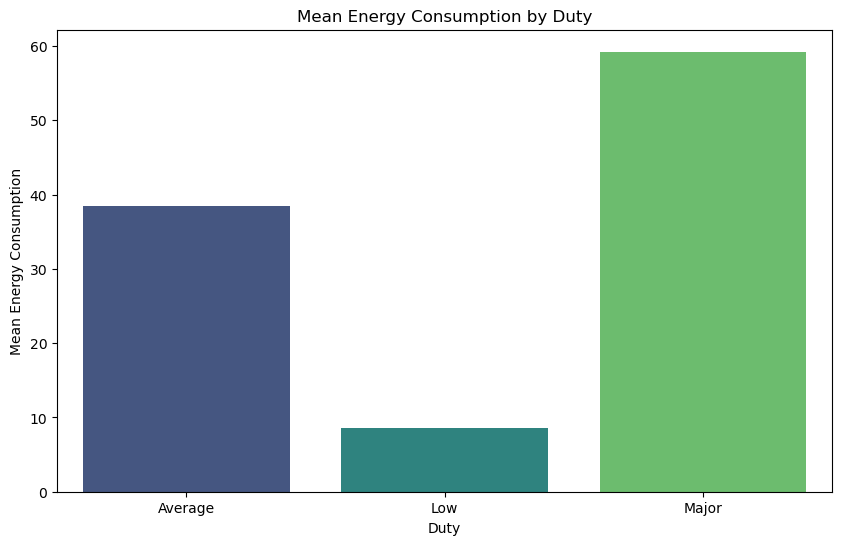

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into 'df'
# Replace 'your_dataset.csv' with the actual file path if you need to load it
# df = pd.read_csv('/mnt/data/your_dataset.csv')

# Map Duty levels
duty_mapping = {0: 'Low', 1: 'Average', 2: 'Major'}
df['Duty'] = df['Duty'].map(duty_mapping)

# Group by Duty and calculate the mean Energy Consumption
energy_duty = df.groupby('Duty')['Energy_Consumption'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Duty', y='Energy_Consumption', data=energy_duty, palette="viridis")
plt.title('Mean Energy Consumption by Duty')
plt.xlabel('Duty')
plt.ylabel('Mean Energy Consumption')
plt.show()


C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_10160\830358387.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date:day', y='Energy_Consumption', data=df, marker='o', palette="pastel")


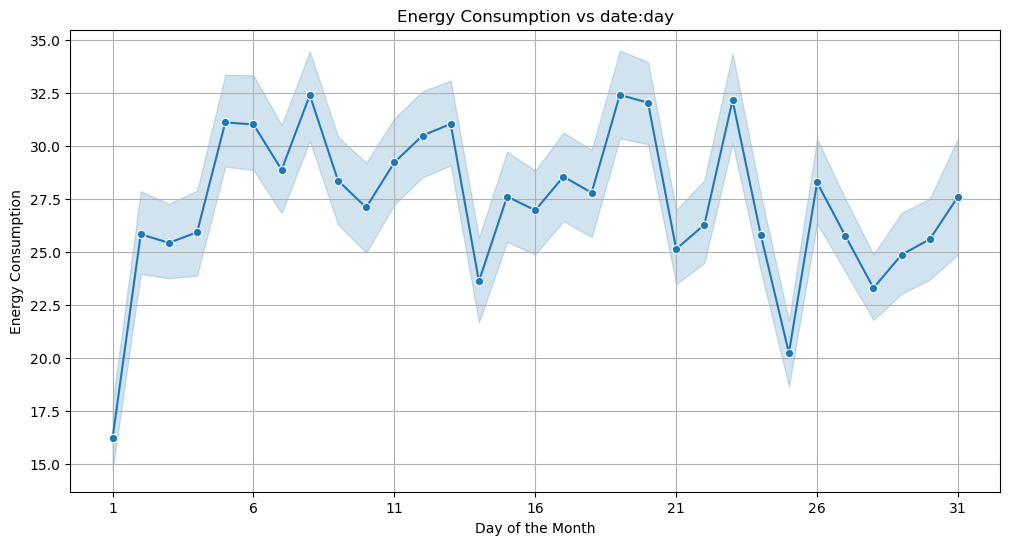

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date:day' is treated as a numerical or categorical value
df['date:day'] = df['date:day'].astype(int)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date:day', y='Energy_Consumption', data=df, marker='o', palette="pastel")

# Customize the x-axis ticks to show every 5 days
plt.xticks(ticks=range(1, df['date:day'].max()+1, 5))

plt.title('Energy Consumption vs date:day')
plt.xlabel('Day of the Month')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:day_of_week', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:day_of_week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date:hour', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date:minute', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:minute')
plt.xlabel('Minute')
plt.ylabel('Energy Consumption')
plt.show()


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                              Energy_Consumption      LaRP      LeRP  \
Energy_Consumption                      1.000000  0.895440 -0.324078   
LaRP                                    0.895440  1.000000 -0.404410   
LeRP                                   -0.324078 -0.404410  1.000000   
LaPF                                    0.387515  0.145180  0.526259   
LePF                                    0.352853  0.406997 -0.943987   
Emissions_Air_Quality_Metric            0.987338  0.885388 -0.331402   
date:month                             -0.112913 -0.040300 -0.027563   
date:day                               -0.007166 -0.011055 -0.014805   
date:day_of_week                       -0.241990 -0.257404  0.213454   
date:day_of_year                       -0.112503 -0.040675 -0.028729   
date:is_year_start                     -0.037173 -0.036090  0.042750   
date:is_quarter_start                  -0.060145 -0.053414  0.052837   
date:is_year_end                       -0.037396 -0.037988  0.03

C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_10160\1715194406.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [39]:
# Find the absolute values of the correlations with 'Energy_Consumption'
correlation_with_target = correlation_matrix['Energy_Consumption'].abs()

# Sort the features by their absolute correlation with 'Energy_Consumption'
sorted_correlation = correlation_with_target.sort_values(ascending=False)

In [41]:
# Display the sorted correlations
print("\nFeatures sorted by correlation with Energy_Consumption:\n", sorted_correlation)

# Best feature
best_feature = sorted_correlation.index[1]  # The first index is 'Energy_Consumption' itself
print("\nBest feature to estimate Energy_Consumption:", best_feature)


Features sorted by correlation with Energy_Consumption:
 Energy_Consumption              1.000000
Emissions_Air_Quality_Metric    0.987338
LaRP                            0.895440
TRP                             0.830743
Combined PF                     0.690033
LaPF                            0.387515
LePF                            0.352853
date:day_part                   0.344423
LeRP                            0.324078
date:is_weekend                 0.295366
date:day_of_week                0.241990
date:hour                       0.234682
date:month                      0.112913
date:day_of_year                0.112503
date:is_quarter_end             0.067091
date:is_month_start             0.061453
date:is_quarter_start           0.060145
date:is_year_end                0.037396
date:is_year_start              0.037173
date:minute                     0.017034
date:is_month_end               0.010909
date:day                        0.007166
Name: Energy_Consumption, dtype: float64

In [43]:
# List of features to keep
features_to_keep = [
    'Energy_Consumption', 
    'Emissions_Air_Quality_Metric', 
    'LaRP',
    'TRP', 
    'Combined PF', 
    'Duty', 
    'LaPF', 
    'date:day_part'
]

# Creating a new DataFrame with only the selected features
df_selected_features = df[features_to_keep]

# Displaying the new DataFrame
df_selected_features

,Energy_Consumption,Emissions_Air_Quality_Metric,LaRP,TRP,Combined PF,Duty,LaPF,date:day_part
0,3.21,105,2.96,2.96,86.605,Low,73.21,0
1,3.95,101,4.46,4.46,83.390,Low,66.78,0
2,3.23,94,3.28,3.28,85.135,Low,70.27,0
3,3.33,99,3.56,3.56,84.050,Low,68.10,0
4,3.79,109,4.49,4.49,82.360,Low,64.72,0
...,...,...,...,...,...,...,...,...
32845,3.84,91,4.56,4.56,82.185,Low,64.37,7
32846,3.81,99,3.76,3.76,85.355,Low,70.71,0
32847,3.82,107,3.16,3.09,88.315,Low,76.64,0
32848,3.85,105,3.07,2.94,88.840,Low,77.72,0


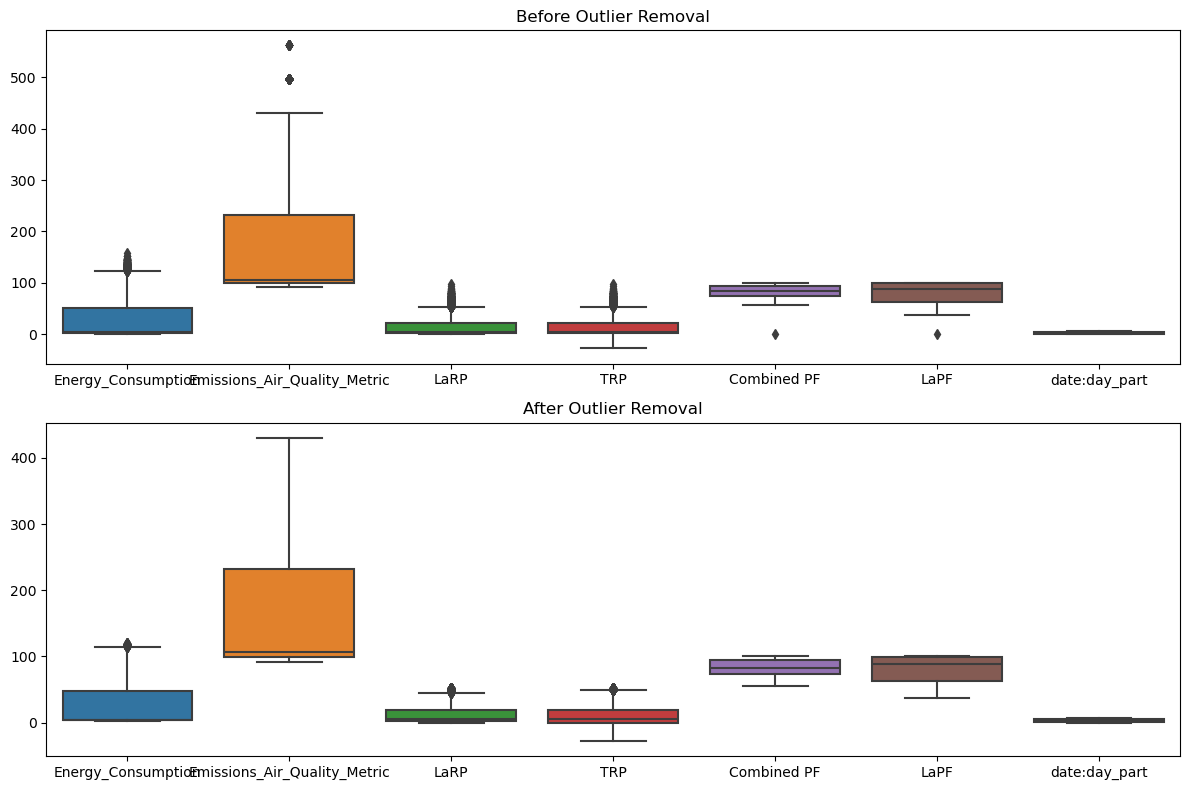

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Removing non-numeric columns for outlier detection
numeric_df = df_selected_features.select_dtypes(include=['float64', 'int64'])

# Calculate Q1, Q3, and IQR for each feature
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df_selected_features[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

# Create plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot before removing outliers
sns.boxplot(data=numeric_df, ax=axes[0])
axes[0].set_title('Before Outlier Removal')

# Plot after removing outliers
sns.boxplot(data=filtered_df.select_dtypes(include=['float64', 'int64']), ax=axes[1])
axes[1].set_title('After Outlier Removal')

# Show the plots
plt.tight_layout()
plt.show()

In [47]:
filtered_df

,Energy_Consumption,Emissions_Air_Quality_Metric,LaRP,TRP,Combined PF,Duty,LaPF,date:day_part
0,3.21,105,2.96,2.96,86.605,Low,73.21,0
1,3.95,101,4.46,4.46,83.390,Low,66.78,0
2,3.23,94,3.28,3.28,85.135,Low,70.27,0
3,3.33,99,3.56,3.56,84.050,Low,68.10,0
4,3.79,109,4.49,4.49,82.360,Low,64.72,0
...,...,...,...,...,...,...,...,...
32845,3.84,91,4.56,4.56,82.185,Low,64.37,7
32846,3.81,99,3.76,3.76,85.355,Low,70.71,0
32847,3.82,107,3.16,3.09,88.315,Low,76.64,0
32848,3.85,105,3.07,2.94,88.840,Low,77.72,0


In [49]:
filtered_df['Duty']=filtered_df['Duty'].replace({'Low':0, 
                       'Average':1,
                       'Major':2})
filtered_df

C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_10160\3997760303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Duty']=filtered_df['Duty'].replace({'Low':0,


,Energy_Consumption,Emissions_Air_Quality_Metric,LaRP,TRP,Combined PF,Duty,LaPF,date:day_part
0,3.21,105,2.96,2.96,86.605,0,73.21,0
1,3.95,101,4.46,4.46,83.390,0,66.78,0
2,3.23,94,3.28,3.28,85.135,0,70.27,0
3,3.33,99,3.56,3.56,84.050,0,68.10,0
4,3.79,109,4.49,4.49,82.360,0,64.72,0
...,...,...,...,...,...,...,...,...
32845,3.84,91,4.56,4.56,82.185,0,64.37,7
32846,3.81,99,3.76,3.76,85.355,0,70.71,0
32847,3.82,107,3.16,3.09,88.315,0,76.64,0
32848,3.85,105,3.07,2.94,88.840,0,77.72,0


Random Forest Results:
   Train Mean Squared Error  Train Root Mean Squared Error  \
0                  0.108817                       0.329874   

   Train Mean Absolute Error  Train R2 Score  Test Mean Squared Error  \
0                   0.112547         0.99988                 1.008084   

   Test Root Mean Squared Error  Test Mean Absolute Error  Test R2 Score  \
0                      1.004034                  0.298287       0.998852   

   Training Time (s)  Testing Time (s)  
0          78.441972          1.416012  


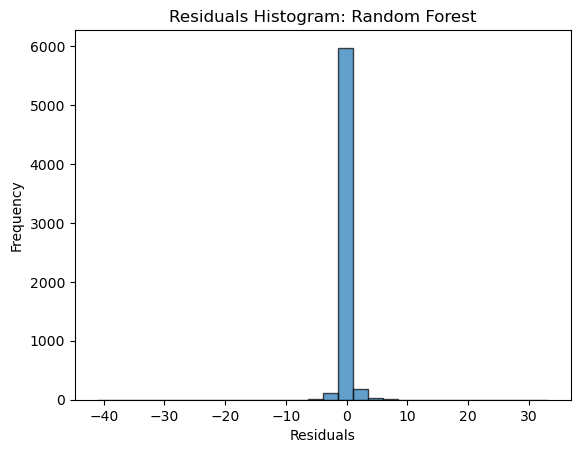

In [122]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt



# X and y split (X = input features and y = target feature)
X = filtered_df.drop(columns=['Energy_Consumption'])
y = filtered_df['Energy_Consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features after the train-test split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest

rf = RandomForestRegressor()
start_time = time.time()
rf.fit(X_train_scaled, y_train)
training_time_rf = time.time() - start_time

# Predict with Random Forest
start_time = time.time()
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)
testing_time_rf = time.time() - start_time

# Evaluate Random Forest
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

results_rf = {
    'Train Mean Squared Error': mse_train_rf,
    'Train Root Mean Squared Error': rmse_train_rf,
    'Train Mean Absolute Error': mae_train_rf,
    'Train R2 Score': r2_train_rf,
    'Test Mean Squared Error': mse_test_rf,
    'Test Root Mean Squared Error': rmse_test_rf,
    'Test Mean Absolute Error': mae_test_rf,
    'Test R2 Score': r2_test_rf,
    'Training Time (s)': training_time_rf,
    'Testing Time (s)': testing_time_rf
}

print("Random Forest Results:")
print(pd.DataFrame(results_rf, index=[0]))

# Plot histogram of residuals for Random Forest
plt.hist(y_test - y_pred_test_rf, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram: Random Forest')
plt.show()

In [124]:
X_train

,Emissions_Air_Quality_Metric,LaRP,TRP,Combined PF,Duty,LaPF,date:day_part
31043,96,3.97,3.60,90.405,2,81.01,7
446,105,3.20,3.20,89.155,0,78.31,0
12259,104,5.28,5.28,76.125,0,52.25,1
7835,108,3.88,3.88,81.345,0,62.69,0
11403,430,43.02,43.02,96.190,2,92.38,6
...,...,...,...,...,...,...,...
30912,298,33.34,33.34,95.190,2,90.38,4
5718,232,12.56,8.83,98.595,2,97.42,4
978,298,14.65,12.11,98.955,1,97.97,7
16428,298,32.51,32.51,94.250,2,88.50,4


In [53]:
filtered_df

,Energy_Consumption,Emissions_Air_Quality_Metric,LaRP,TRP,Combined PF,Duty,LaPF,date:day_part
0,3.21,105,2.96,2.96,86.605,0,73.21,0
1,3.95,101,4.46,4.46,83.390,0,66.78,0
2,3.23,94,3.28,3.28,85.135,0,70.27,0
3,3.33,99,3.56,3.56,84.050,0,68.10,0
4,3.79,109,4.49,4.49,82.360,0,64.72,0
...,...,...,...,...,...,...,...,...
32845,3.84,91,4.56,4.56,82.185,0,64.37,7
32846,3.81,99,3.76,3.76,85.355,0,70.71,0
32847,3.82,107,3.16,3.09,88.315,0,76.64,0
32848,3.85,105,3.07,2.94,88.840,0,77.72,0


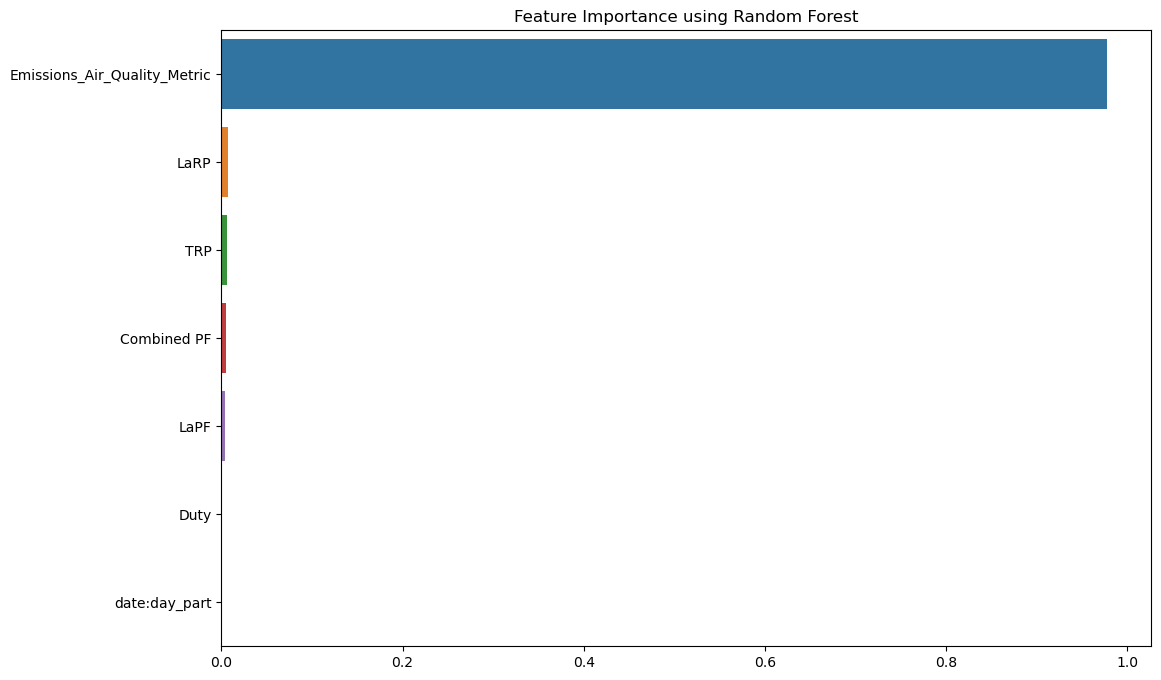

In [73]:
# Train Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance using Random Forest')
plt.show()

In [75]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)


selection.feature_importances_

array([0.56257982, 0.18404072, 0.15490532, 0.0726504 , 0.01287174,
       0.00994018, 0.00301182])

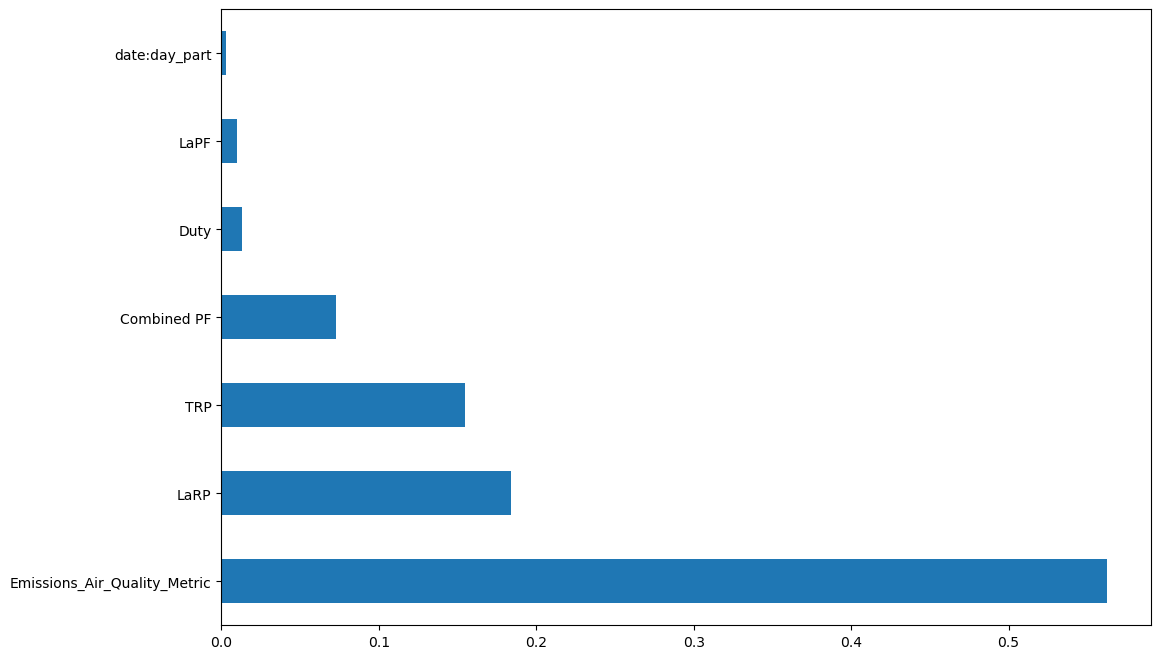

In [77]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [120]:
X_train

array(Ellipsis, dtype=object)

In [83]:
import pandas as pd

file_path = r"C:\Users\EJ312WS\Downloads\Dataset (1)\Dataset\Test.csv"

# Read the Excel file and select the sheet you want to read
df_test = pd.read_csv(file_path)  
# Print the contents of the sheet
df_test.head()


,Unnamed: 0,TimeStamp,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric
0,0,2018-01-01 02:45:00,4.04,0.00,65.15,100.00,Low,109
1,1,2018-01-01 09:45:00,0.00,19.22,100.00,20.00,Low,104
2,2,2018-01-01 11:15:00,0.00,5.66,100.00,52.55,Low,100
3,3,2018-01-01 18:15:00,0.00,8.96,100.00,40.77,Low,106
4,4,2018-01-01 18:30:00,0.00,5.46,100.00,53.02,Low,104


In [85]:
df_test.date=pd.to_datetime(df_test.TimeStamp, infer_datetime_format=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2190 non-null   int64  
 1   TimeStamp                     2190 non-null   object 
 2   LaRP                          2190 non-null   float64
 3   LeRP                          2190 non-null   float64
 4   LaPF                          2190 non-null   float64
 5   LePF                          2190 non-null   float64
 6   Duty                          2190 non-null   object 
 7   Emissions_Air_Quality_Metric  2190 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 137.0+ KB


C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_10160\1918227572.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_test.date=pd.to_datetime(df_test.TimeStamp, infer_datetime_format=True)


In [87]:
def day_part(hour):
    if hour in [4,5]:
        return 1
    elif hour in [6,7]:
        return 2
    elif hour in [8,9,10]:
        return 3
    elif hour in [11,12,13]:
        return 4
    elif hour in [14,15,16]:
        return 5
    elif hour in [17, 18,19]:
        return 6
    elif hour in [20, 21, 22]:
        return 7
    elif hour in [23,0,1,2,3]:
        return 0

In [89]:
import pandas as pd
import numpy as np

# Sample data (assuming df_test is already loaded with your data)
# df_test = pd.read_csv('path_to_your_file.csv')

# Convert the 'TimeStamp' column to datetime
df_test['date'] = pd.to_datetime(df_test['TimeStamp'])

# Extract date features
df_test['date:year'] = df_test['date'].dt.year
df_test['date:month'] = df_test['date'].dt.month
df_test['date:day'] = df_test['date'].dt.day
df_test['date:day_of_week'] = df_test['date'].dt.dayofweek  # corrected attribute name
df_test['date:day_of_year'] = df_test['date'].dt.dayofyear  # corrected attribute name
df_test['date:is_year_start'] = df_test['date'].dt.is_year_start
df_test['date:is_quarter_start'] = df_test['date'].dt.is_quarter_start
df_test['date:is_year_end'] = df_test['date'].dt.is_year_end
df_test['date:is_quarter_end'] = df_test['date'].dt.is_quarter_end
df_test['date:is_month_start'] = df_test['date'].dt.is_month_start
df_test['date:is_month_end'] = df_test['date'].dt.is_month_end
df_test['date:is_weekend'] = np.where(df_test['date:day_of_week'].isin([5, 6]), 1, 0)
df_test['date:hour'] = df_test['date'].dt.hour
df_test['date:minute'] = df_test['date'].dt.minute

# Define the day_part function
def day_part(hour):
    if hour in [4,5]:
        return 1
    elif hour in [6,7]:
        return 2
    elif hour in [8,9,10]:
        return 3
    elif hour in [11,12,13]:
        return 4
    elif hour in [14,15,16]:
        return 5
    elif hour in [17, 18,19]:
        return 6
    elif hour in [20, 21, 22]:
        return 7
    elif hour in [23,0,1,2,3]:
        return 0

df_test['date:day_part'] = df_test['date:hour'].apply(day_part)

# Convert boolean columns to integer
df_test[['date:is_month_end', 'date:is_month_start',
         'date:is_quarter_end', 'date:is_quarter_start',
         'date:is_year_end', 'date:is_year_start']] = df_test[['date:is_month_end', 'date:is_month_start',
                                                              'date:is_quarter_end', 'date:is_quarter_start',
                                                              'date:is_year_end', 'date:is_year_start']].replace({True: 1, False: 0})

# Drop the original 'date' and 'TimeStamp' columns if desired
df_test = df_test.drop(['date', 'TimeStamp'], axis=1)

# Print the first few rows of the modified DataFrame
df_test.head()


,Unnamed: 0,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:year,date:month,date:day,...,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,0,4.04,0.00,65.15,100.00,Low,109,2018,1,1,...,1,1,0,0,1,0,0,2,45,0
1,1,0.00,19.22,100.00,20.00,Low,104,2018,1,1,...,1,1,0,0,1,0,0,9,45,3
2,2,0.00,5.66,100.00,52.55,Low,100,2018,1,1,...,1,1,0,0,1,0,0,11,15,4
3,3,0.00,8.96,100.00,40.77,Low,106,2018,1,1,...,1,1,0,0,1,0,0,18,15,6
4,4,0.00,5.46,100.00,53.02,Low,104,2018,1,1,...,1,1,0,0,1,0,0,18,30,6


In [91]:
nunique_df=df_test.nunique().reset_index()
remove_col=nunique_df[(nunique_df[0]==0) | (nunique_df[0]==1) ]['index'].tolist()
remove_col[:5]

['date:year']

In [93]:
df_test=df_test.drop(remove_col,axis=1)
df_test

,Unnamed: 0,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,date:day_of_week,...,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,0,4.04,0.00,65.15,100.00,Low,109,1,1,0,...,1,1,0,0,1,0,0,2,45,0
1,1,0.00,19.22,100.00,20.00,Low,104,1,1,0,...,1,1,0,0,1,0,0,9,45,3
2,2,0.00,5.66,100.00,52.55,Low,100,1,1,0,...,1,1,0,0,1,0,0,11,15,4
3,3,0.00,8.96,100.00,40.77,Low,106,1,1,0,...,1,1,0,0,1,0,0,18,15,6
4,4,0.00,5.46,100.00,53.02,Low,104,1,1,0,...,1,1,0,0,1,0,0,18,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,0.00,13.22,100.00,24.57,Low,96,12,31,0,...,0,0,1,1,0,1,0,12,45,4
2186,2186,0.00,13.50,100.00,23.80,Low,99,12,31,0,...,0,0,1,1,0,1,0,13,30,4
2187,2187,0.00,5.88,100.00,49.57,Low,101,12,31,0,...,0,0,1,1,0,1,0,18,15,6
2188,2188,0.00,20.08,100.00,20.19,Low,105,12,31,0,...,0,0,1,1,0,1,0,20,0,7


In [95]:
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test.head()

,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,date:day_of_week,date:day_of_year,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,4.04,0.00,65.15,100.00,Low,109,1,1,0,1,1,1,0,0,1,0,0,2,45,0
1,0.00,19.22,100.00,20.00,Low,104,1,1,0,1,1,1,0,0,1,0,0,9,45,3
2,0.00,5.66,100.00,52.55,Low,100,1,1,0,1,1,1,0,0,1,0,0,11,15,4
3,0.00,8.96,100.00,40.77,Low,106,1,1,0,1,1,1,0,0,1,0,0,18,15,6
4,0.00,5.46,100.00,53.02,Low,104,1,1,0,1,1,1,0,0,1,0,0,18,30,6


In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Compute the correlation matrix
correlation_matrix = df_test.corr()

# Print the correlation matrix
print(correlation_matrix)



                                  LaRP      LeRP      LaPF      LePF  \
LaRP                          1.000000 -0.417059  0.134538  0.419313   
LeRP                         -0.417059  1.000000  0.534272 -0.944774   
LaPF                          0.134538  0.534272  1.000000 -0.529016   
LePF                          0.419313 -0.944774 -0.529016  1.000000   
Emissions_Air_Quality_Metric  0.897852 -0.344261  0.359142  0.370921   
date:month                   -0.068608 -0.020217 -0.076155 -0.039570   
date:day                     -0.027621  0.003243  0.016696 -0.010828   
date:day_of_week             -0.239683  0.205190  0.046212 -0.247408   
date:day_of_year             -0.070150 -0.019974 -0.073998 -0.040214   
date:is_year_start           -0.039674  0.037998  0.036636 -0.061065   
date:is_quarter_start        -0.058699  0.043119 -0.004581 -0.067382   
date:is_year_end             -0.039247  0.053391  0.035213 -0.074431   
date:is_quarter_end          -0.065082  0.048064  0.013538 -0.08

C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_10160\1455178506.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_test.corr()


In [99]:
df_test['Duty']=df_test['Duty'].replace({'Low':0,
                       'Average':1,
                       'Major':2})
df_test

,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,date:day_of_week,date:day_of_year,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,4.04,0.00,65.15,100.00,0,109,1,1,0,1,1,1,0,0,1,0,0,2,45,0
1,0.00,19.22,100.00,20.00,0,104,1,1,0,1,1,1,0,0,1,0,0,9,45,3
2,0.00,5.66,100.00,52.55,0,100,1,1,0,1,1,1,0,0,1,0,0,11,15,4
3,0.00,8.96,100.00,40.77,0,106,1,1,0,1,1,1,0,0,1,0,0,18,15,6
4,0.00,5.46,100.00,53.02,0,104,1,1,0,1,1,1,0,0,1,0,0,18,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0.00,13.22,100.00,24.57,0,96,12,31,0,365,0,0,1,1,0,1,0,12,45,4
2186,0.00,13.50,100.00,23.80,0,99,12,31,0,365,0,0,1,1,0,1,0,13,30,4
2187,0.00,5.88,100.00,49.57,0,101,12,31,0,365,0,0,1,1,0,1,0,18,15,6
2188,0.00,20.08,100.00,20.19,0,105,12,31,0,365,0,0,1,1,0,1,0,20,0,7


In [101]:
# Replace 0 with 0.1 in the 'LeRP' column
df_test['LeRP'] = df_test['LeRP'].replace(0, 0.1)

# Total Reactive Power (TRP)
df_test['TRP'] = df_test['LaRP'] - df_test['LeRP']


# Combined Power Factor (Combined PF)
df_test['Combined PF'] = (df_test['LaPF'] + df_test['LePF']) / 2

# Displaying the DataFrame
df_test.head()


,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,date:day_of_week,date:day_of_year,...,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part,TRP,Combined PF
0,4.04,0.10,65.15,100.00,0,109,1,1,0,1,...,0,0,1,0,0,2,45,0,3.94,82.575
1,0.00,19.22,100.00,20.00,0,104,1,1,0,1,...,0,0,1,0,0,9,45,3,-19.22,60.000
2,0.00,5.66,100.00,52.55,0,100,1,1,0,1,...,0,0,1,0,0,11,15,4,-5.66,76.275
3,0.00,8.96,100.00,40.77,0,106,1,1,0,1,...,0,0,1,0,0,18,15,6,-8.96,70.385
4,0.00,5.46,100.00,53.02,0,104,1,1,0,1,...,0,0,1,0,0,18,30,6,-5.46,76.510


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_test['Duty']=df_test['Duty'].replace({'Low':0,
                       'Average':1,
                       'Major':2})


# Compute the correlation matrix
correlation_matrix = df_test.corr()

# Print the correlation matrix
print(correlation_matrix)

                                  LaRP      LeRP      LaPF      LePF  \
LaRP                          1.000000 -0.416150  0.134538  0.419313   
LeRP                         -0.416150  1.000000  0.532992 -0.944567   
LaPF                          0.134538  0.532992  1.000000 -0.529016   
LePF                          0.419313 -0.944567 -0.529016  1.000000   
Duty                          0.443026  0.002344  0.504593  0.077959   
Emissions_Air_Quality_Metric  0.897852 -0.344048  0.359142  0.370921   
date:month                   -0.068608 -0.020801 -0.076155 -0.039570   
date:day                     -0.027621  0.003021  0.016696 -0.010828   
date:day_of_week             -0.239683  0.204916  0.046212 -0.247408   
date:day_of_year             -0.070150 -0.020575 -0.073998 -0.040214   
date:is_year_start           -0.039674  0.037827  0.036636 -0.061065   
date:is_quarter_start        -0.058699  0.043086 -0.004581 -0.067382   
date:is_year_end             -0.039247  0.053294  0.035213 -0.07

In [105]:
# List of features to keep
features_to_keep = [
    'Emissions_Air_Quality_Metric',
    'LaRP',
    'TRP',
    'Combined PF',
    'Duty',
    'LaPF',
    'date:day_part'
]

# Creating a new DataFrame with only the selected features
df_test_selected_features = df_test[features_to_keep]

# Displaying the new DataFrame
df_test_selected_features

,Emissions_Air_Quality_Metric,LaRP,TRP,Combined PF,Duty,LaPF,date:day_part
0,109,4.04,3.94,82.575,0,65.15,0
1,104,0.00,-19.22,60.000,0,100.00,3
2,100,0.00,-5.66,76.275,0,100.00,4
3,106,0.00,-8.96,70.385,0,100.00,6
4,104,0.00,-5.46,76.510,0,100.00,6
...,...,...,...,...,...,...,...
2185,96,0.00,-13.22,62.285,0,100.00,4
2186,99,0.00,-13.50,61.900,0,100.00,4
2187,101,0.00,-5.88,74.785,0,100.00,6
2188,105,0.00,-20.08,60.095,0,100.00,7


In [126]:
X_train

,Emissions_Air_Quality_Metric,LaRP,TRP,Combined PF,Duty,LaPF,date:day_part
31043,96,3.97,3.60,90.405,2,81.01,7
446,105,3.20,3.20,89.155,0,78.31,0
12259,104,5.28,5.28,76.125,0,52.25,1
7835,108,3.88,3.88,81.345,0,62.69,0
11403,430,43.02,43.02,96.190,2,92.38,6
...,...,...,...,...,...,...,...
30912,298,33.34,33.34,95.190,2,90.38,4
5718,232,12.56,8.83,98.595,2,97.42,4
978,298,14.65,12.11,98.955,1,97.97,7
16428,298,32.51,32.51,94.250,2,88.50,4


In [128]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Initialize the classifier
# Initialize and train the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_train)

In [132]:
predictions_df = pd.DataFrame(y_pred,columns=['Energy_Consumption'])
predictions_df.to_csv('Energy_Consumption_new_4.csv',index=False)